In [84]:
import logging
import pandas as pd
import numpy as np

In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(name)s %(message)s', level=logging.INFO)

In [91]:
import downloader

In [94]:
import download_datasets

In [95]:
dfs=download_datasets.get_datasets()

2022-07-17 16:00:33,186 INFO root processing: data_sources/EuropeanMeanTemperatureSinceRomanTime_EuroMed2k.toml
/home/dsc/gith/domschl/indrajala/python_indrajala/examples/importers/downloader.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.log.error("Transform {t[0]} isn't available!")
2022-07-17 16:00:33,199 INFO root processing: data_sources/DWDGermanJulyMeanTemperature.toml
2022-07-17 16:00:33,206 INFO root processing: data_sources/DWDGermanJuneMeanTemperature.toml
2022-07-17 16:00:33,211 INFO root processing: data_sources/DWDGermanAugustMeanTemperature.toml
2022-07-17 16:00:33,217 INFO root processing: data_sources/11000yearsunspotnumber.toml
2022-07-17 16:00:33,223 INFO root processing: data_sources/GISP2IceCoreTemperatureAlley2004.toml
2022-07-17 16:00:33,231 INFO root processin

In [96]:
dfs.keys()

dict_keys(['euromed2k', 'germany_july_meantemp', 'germany_june_meantemp', 'germany_august_meantemp', 'sunspots11000yrs', 'gisp2icecoretemp', 'gisp2icecoreaccum', 'geologictimescale'])

In [77]:
dfs['geologictimescale']

,Eonothem/Eon,Erathem/Era,System/Period,Series/Epoch,Stage/Age,Major events,"Start, million years ago[note 7]"
0,Phanerozoic,Cenozoic[note 4],Quaternary,Holocene,Meghalayan,"4.2-kiloyear event, Austronesian expansion, in...",0.0042 *
1,Phanerozoic,Cenozoic[note 4],Quaternary,Holocene,Northgrippian,"8.2-kiloyear event, Holocene climatic optimum....",0.0082 *
2,Phanerozoic,Cenozoic[note 4],Quaternary,Holocene,Greenlandian,Climate stabilizes. Current interglacial and H...,0.0117 ± 0.000099 *
3,Phanerozoic,Cenozoic[note 4],Quaternary,Pleistocene,Upper/Late ('Tarantian'),"Eemian interglacial, last glacial period, endi...",0.129
4,Phanerozoic,Cenozoic[note 4],Quaternary,Pleistocene,Chibanian,"Mid-Pleistocene Transition occurs, high amplit...",0.774 *
...,...,...,...,...,...,...,...
112,Archean,Neoarchean,Stabilization of most modern cratons; possible...,Stabilization of most modern cratons; possible...,Stabilization of most modern cratons; possible...,Stabilization of most modern cratons; possible...,2800 [note 11]
113,Archean,Mesoarchean,First stromatolites (probably colonial phototr...,First stromatolites (probably colonial phototr...,First stromatolites (probably colonial phototr...,First stromatolites (probably colonial phototr...,3200 [note 11]
114,Archean,Paleoarchean,Prokaryotic archaea (e.g. methanogens) and bac...,Prokaryotic archaea (e.g. methanogens) and bac...,Prokaryotic archaea (e.g. methanogens) and bac...,Prokaryotic archaea (e.g. methanogens) and bac...,3600 [note 11]
115,Archean,Eoarchean,First uncontroversial living organisms: at fir...,First uncontroversial living organisms: at fir...,First uncontroversial living organisms: at fir...,First uncontroversial living organisms: at fir...,4000 [note 11]


In [25]:
em2k=dfs['euromed2k'].to_numpy()
gjmt6=dfs['germany_june_meantemp'].to_numpy()
gjmt7=dfs['germany_july_meantemp'].to_numpy()
gjmt8=dfs['germany_august_meantemp'].to_numpy()
sunsp=dfs['sunspots11000yrs'].to_numpy()

In [26]:
sunsp[:,0]=1950-sunsp[:,0]

In [27]:
sunsp[:,1]

array([37.4, 57.1, 89. , ..., 40. , 27. , 28.7])

In [28]:
gjmt=(gjmt6[:-1,:]+gjmt7+gjmt8)/3.0

In [29]:
np.mean(gjmt[:,2])

17.553569739952717

In [30]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [31]:
gjmean=np.mean(gjmt[:,2])

In [32]:
win=10
em2kmat=moving_average(em2k[:,1],2*win+1)
gjmtmat=moving_average(gjmt[:,2]-gjmean,2*win+1)

In [33]:
sunma=moving_average(sunsp[:,1],2*win+1)

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,8]  # inch! :-/

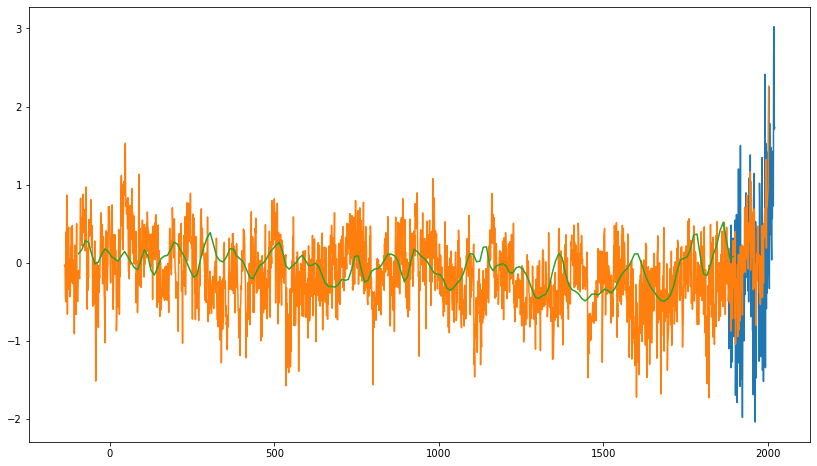

In [37]:
plt.plot(gjmt[:,0],gjmt[:,2]-gjmean)
plt.plot(em2k[:,0],em2k[:,1])
plt.plot(sunsp[-200:,0],sunsp[-200:,1]/60-0.4)

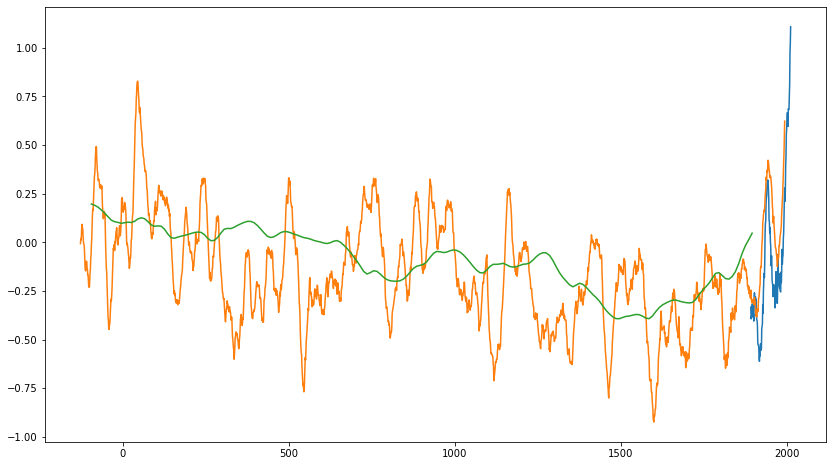

In [38]:
# plt.plot(dfnp[:,0],dfnp[:,1])
plt.plot(gjmt[win:-win,0],gjmtmat)
plt.plot(em2k[win:-win,0],em2kmat)
plt.plot(sunsp[-200:,0],sunma[-200:]/50-0.5)

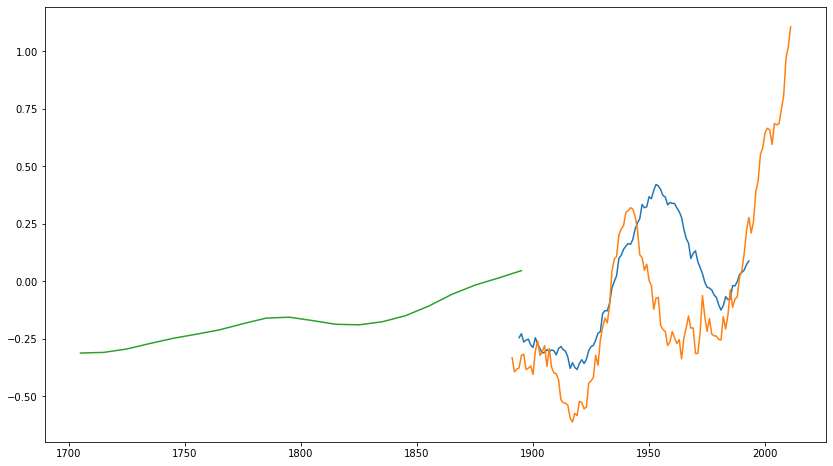

In [39]:
plt.plot(em2k[-120+win:-win,0],em2kmat[-120+win:-win])
plt.plot(gjmt[win:-win,0],gjmtmat)
plt.plot(sunsp[-20:,0],sunma[-20:]/50-0.5)

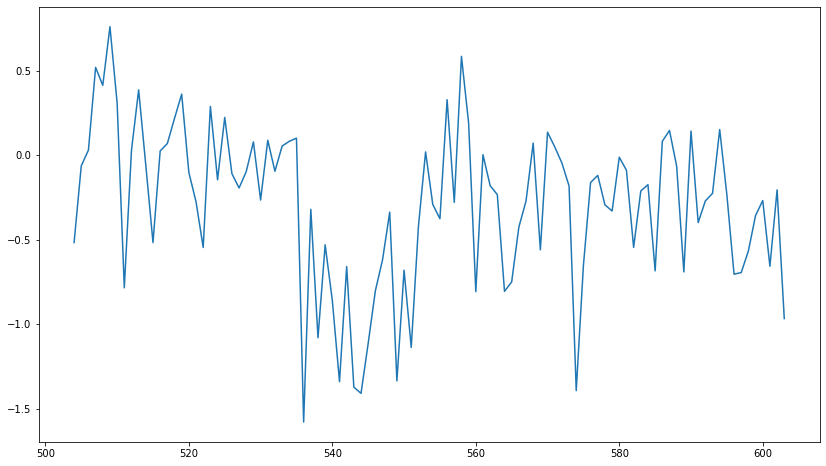

In [40]:
a=-1500
b=-1400
plt.plot(em2k[a:b,0],em2k[a:b,1])
plt.plot(gjmt[a:b,0],gjmtmat[a-win:b-win])
